In [1]:
# Load data from MySQL to perform exploratory data analysis
import settings
import mysql.connector
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="Liquid@123",
    auth_plugin='mysql_native_password',
    database="TwitterDB",
    charset = 'utf8'
)

Airbnb Negative Tweets Monitor: 
  2020-09-10 16:28:05  RT @JULIASTULTZ1: https://t.co/1yDtD4F12m WHAT WE WANT FROM YOU TWO, HAVE YOU BEEN TO PEDIFILE ISLAND AND DID YOU EVER USE THE STUPID PROGR
  2020-09-10 16:28:12  Join our Facebook page to watch the game! https://t.co/UnCQHVnYyf @ReadingAthletic @RCCSDSupt @CoachCReardon https://t.co/xd3MAYeSk2
  2020-09-10 16:28:23  @Twitch @Ninja Sorry i care or want ninja on Twitch he ruined mixer for me and a lot of others and he's not even th https://t.co/grZiWFwe0B
  2020-09-10 16:28:27  @i_am_weeb_trash i have two mutual friends with his mom on facebook and i think every day about how i was an idiot https://t.co/hSCRqQi9GA
  2020-09-10 16:28:28  Today, #Eugene #Oregons air quality is said to be the worst in the world, literally. Therere virtually no one &amp; n https://t.co/zKqrSQwjyq
  2020-09-10 16:28:31  RT @HywoodMartin: Oh Facebook memories...

On this day 2016 I walked an impossible mile to @LUFC , I was in agony but I got the biggest

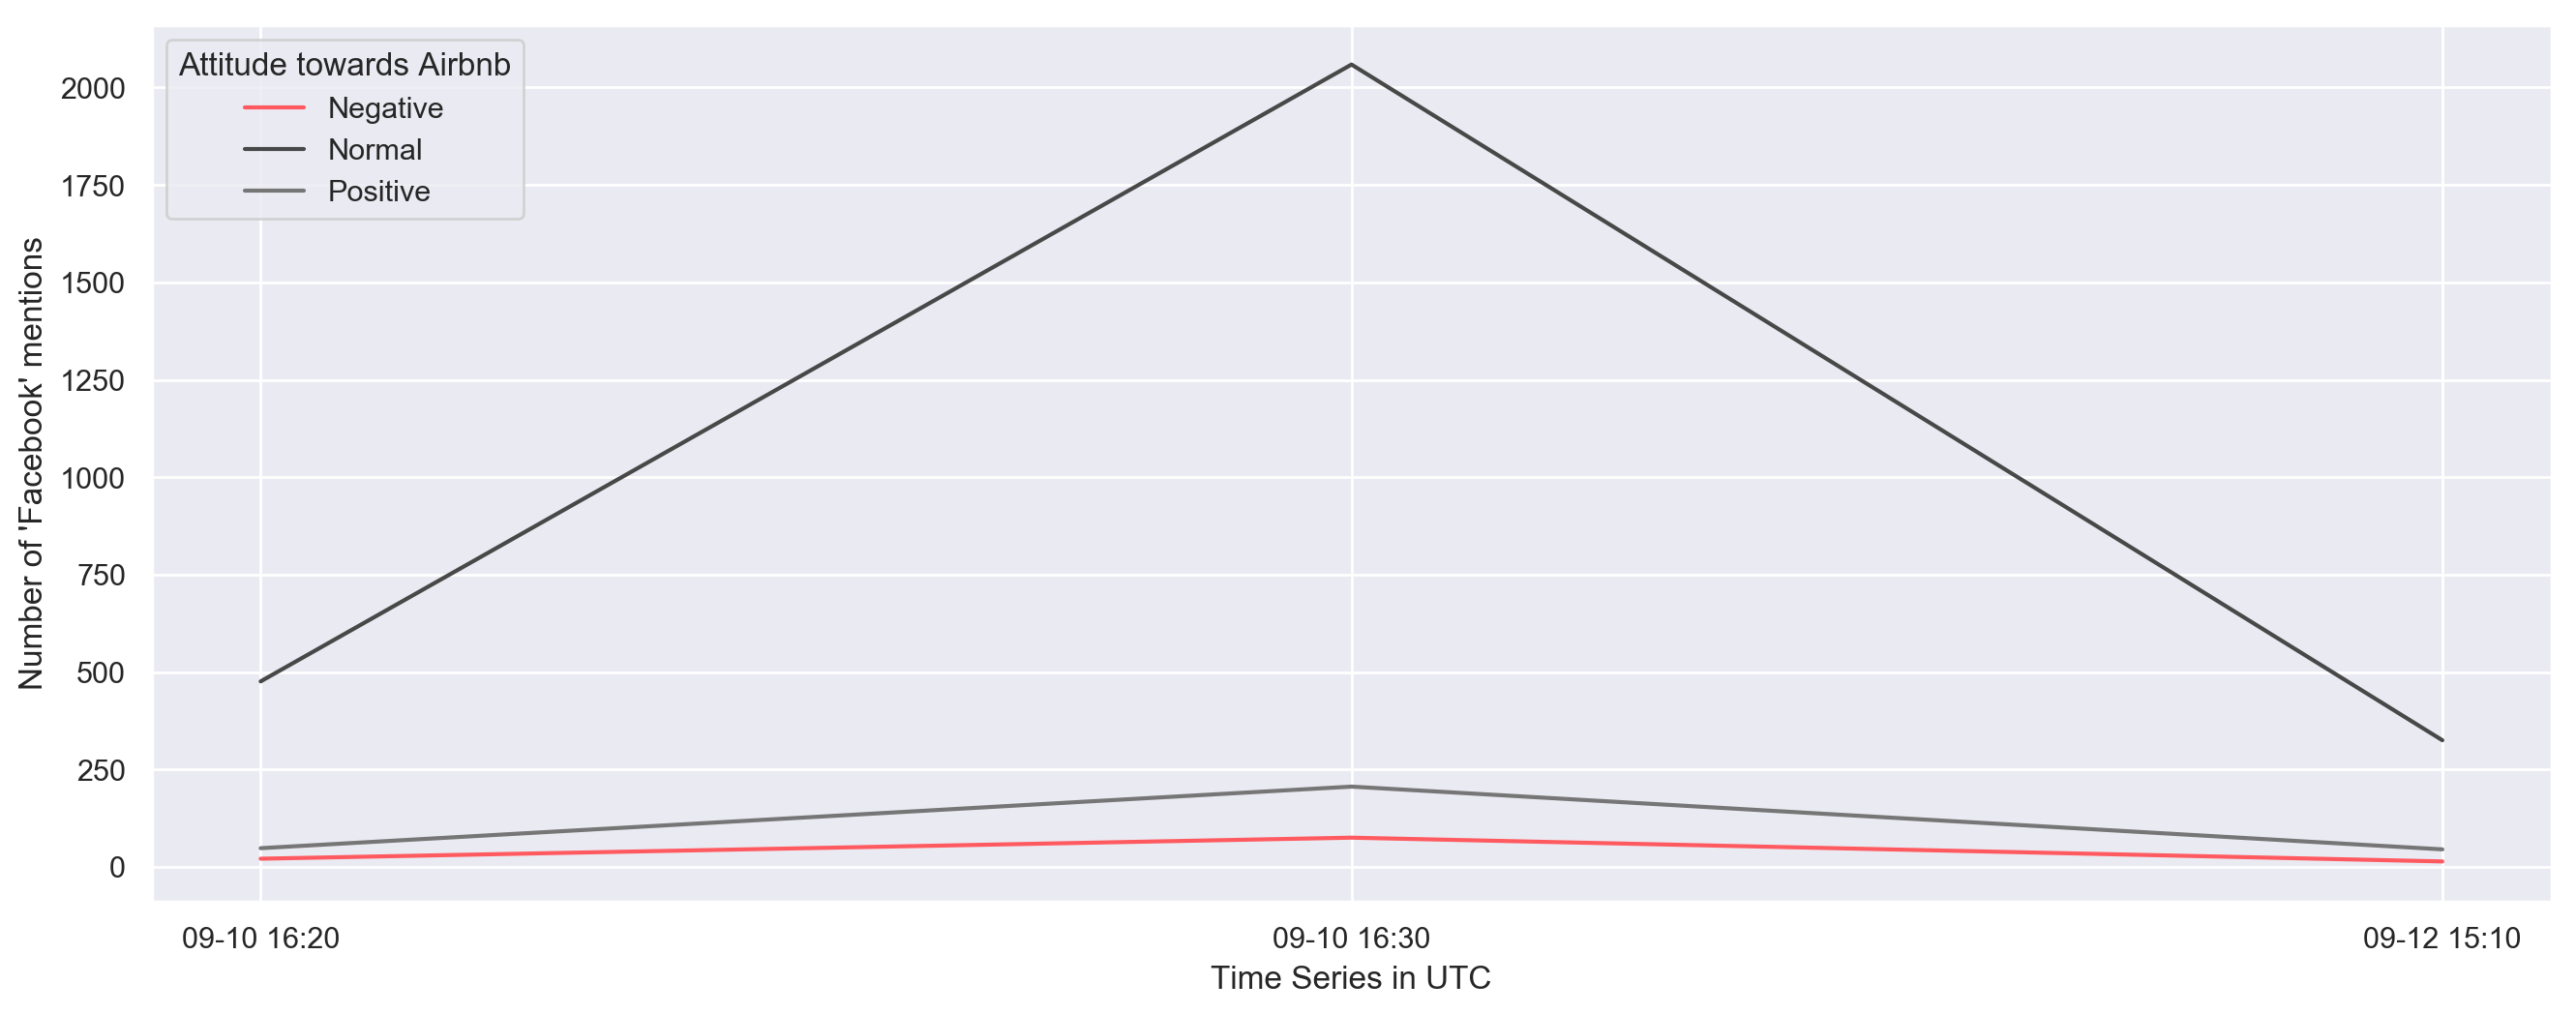

In [2]:
# Load data from MySQL
df = pd.read_sql('SELECT id_str, text, created_at, polarity, user_location FROM {}'.format(settings.TABLE_NAME), con=db_connection)
# UTC for date time at default
df['created_at'] = pd.to_datetime(df['created_at'])
print("Airbnb Negative Tweets Monitor: ")
for index, tweets in df[df['polarity'] == -1].iterrows():
    print("  " +str(tweets[2]) + "  " + tweets[1])


# Clean and transform data to enable time series
result = df.groupby([pd.Grouper(key='created_at', freq='10min'), 'polarity']).count() \
        .unstack(fill_value=0).stack().reset_index()
result['created_at'] = pd.to_datetime(result['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))


# Plot Line Chart for monitoring brand awareness on Twitter
mpl.rcParams['figure.dpi']= 200
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.lineplot(x = "created_at" ,y="id_str", hue='polarity', data=result,\
                  palette=sns.color_palette(["#FF5A5F","#484848", "#767676"]))
ax.set(xlabel='Time Series in UTC', ylabel="Number of '{}' mentions".format(settings.TRACK_WORDS[0]))
plt.legend(title='Attitude towards Airbnb', loc='upper left', labels=['Negative', 'Normal', 'Positive'])
sns.set(rc={"lines.linewidth": 1})
plt.show()

In [3]:
# Next step: find out geo-distribution of users
# Find where tweets come from according to their users' location
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("Columbus, Oh")
print((location.latitude, location.longitude))
location.address

ConfigurationError: Using Nominatim with default or sample `user_agent` "specify_your_app_name_here" is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`.